# Análise de Keywords: Datasets Airbnb / Rio de Janeiro

Neste notebook é apresentada uma análise das keywords obtidas a partir de avaliações das acomadações do Airbnb presentes no arquivo 'reviews.csv.gz'.

## Importando bibliotecas

In [1]:
import math
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from operator import itemgetter
from langdetect import detect



import warnings
warnings.filterwarnings('ignore')

## Importando dataset e visualizando os dados

In [2]:
%cd /mnt/ced80f5d-ab66-4e0c-ad3f-f8f34fb3be44/Dropbox/novos/CognitivoDesafio/Dados
%ls

/mnt/ced80f5d-ab66-4e0c-ad3f-f8f34fb3be44/Dropbox/novos/CognitivoDesafio/Dados
calendar.csv.gz        listings.csv            reviews.csv
dados_airbnb.png       listings.csv.gz         reviews.csv.gz
data_for_modeling.csv  neighbourhoods.csv      reviews_with_language.csv
links.txt              neighbourhoods.geojson


### Arquivo 'listings.csv.gz'

In [3]:
df_listings = pd.read_csv("listings.csv.gz")
df_listings.shape

(26615, 74)

In [4]:
pd.set_option("display.max_columns", 500)
df_listings.head() #['listing_id']

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",$221.00,5,180,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,0,8,38,304,2021-02-23,260,12,2,2010-07-15,2021-02-08,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\r\nI am a filmmaker and a tea...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",$307.00,3,90,3.0,3.0,90.0,90.0,3.0,90.0,NaN,t,0,0,0,10,2021-02-23,85,0,0,2010-09-26,2018-02-14,95.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,Ghizlane,2012-10-03,"Rio de Janeiro, Rio de Janeiro, Brazil","French girl ""lost in Brazilian translation"" si...",within a few hours,97%,78%,f,https://a0.muscache.com/im/pictures/user/fffed...,https://a0.muscache.com/im/pictures/user/fffed...,Ipanema,11.0,11.0,"['phone', 'reviews', 'jumio', 'offline_governm...",t,f,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97712,-43.19045,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Elevator"", ""Dedicated workspace"", ""Kitche

In [5]:
df_listings['id'].nunique()

26615

O arquivo 'listings.csv.gz' apresenta informações gerais sobre as acomodações disponíveis na plataforma, como detalhes da acomodação em si, do *host*, do bairro e das avaliações feitas. 

### Arquivo 'reviews.csv.gz'

In [6]:
df_reviews = pd.read_csv("reviews.csv.gz")
df_reviews.shape

(323274, 6)

In [7]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r\n...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...


In [8]:
df_reviews.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments
323269,48135806,731928728,2021-02-16,169606187,Giovanna,"Lugar aconchegante e excelente localização, fá..."
323270,48137327,731173377,2021-02-14,319220408,Beatriz,Ótima estadia!
323271,48137327,731531946,2021-02-15,381209568,Raquel,"Muito bom, adorei"
323272,48145839,731963072,2021-02-16,377683636,Diogo,"Apartamento excelente, impecável, limpo, aconc..."
323273,48156680,733222988,2021-02-21,18715876,Domenica,"Ótima localização, flexível e receptivo."


O arquivo 'reviews.csv.gz' apresenta basicamente os comentários dos hospedes sobre as acomodações. Podemos observar que há comentários em várias línguas.

### Fusão dos datasets

Fusão dos dois dataset anteriores realizada com o objetivo de enriquecer a base de análise. A fusão é feita a partir das features 'id' ('listings.csv.gz') e listing_id ('reviews.csv.gz') que estão associadas a cada acomodação única.

In [9]:
df_merge = pd.merge(df_reviews, df_listings[['id', 'name', 
                                            'description', 'neighborhood_overview',
                                            'neighbourhood', 'neighbourhood_cleansed',
                                            'price']],
                   left_on="listing_id", right_on='id')
df_merge.shape

(323274, 13)

In [10]:
df_merge.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,name,description,neighborhood_overview,neighbourhood,neighbourhood_cleansed,price
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,"Rio de Janeiro, Brazil",Copacabana,$221.00
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,"Rio de Janeiro, Brazil",Copacabana,$221.00
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,"Rio de Janeiro, Brazil",Copacabana,$221.00
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r\n...,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,"Rio de Janeiro, Brazil",Copacabana,$221.00
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,"Rio de Janeiro, Brazil",Copacabana,$221.00


Todos os caracteres de 'reviews' são deixadas em minúsculas para melhor performance do algorítimo usado a seguir.

In [11]:
df_merge['reviews'] = df_merge['comments'].str.lower()
df_merge[['reviews']].head()

,reviews
0,this apartment is in a perfect location -- two...
1,we had a really great experience staying in ma...
2,staying in max appartment is like living in a ...
3,in general very good and reasonable price.\r\n...
4,the apt was nice and in a great location only ...


In [12]:
df_merge["listing_id"].nunique()

16657

## Análise das Keywords

### Separação de *reviews* por idioma

A primeira parte da análise corresponde a separação dos *reviews* por idioma.

In [13]:
df_merge['reviews'] = df_merge['reviews'].astype(str)

df_keywords = df_merge[["listing_id", "reviews"]]
print(df_keywords.shape)

(323274, 2)


In [14]:
df_keywords.head()

,listing_id,reviews
0,17878,this apartment is in a perfect location -- two...
1,17878,we had a really great experience staying in ma...
2,17878,staying in max appartment is like living in a ...
3,17878,in general very good and reasonable price.\r\n...
4,17878,the apt was nice and in a great location only ...


In [15]:
df_keywords = df_keywords.drop_duplicates()
df_keywords.shape

(323030, 2)

In [ ]:
# Identificando o idioma de cada review

for idx, row in df_keywords.iterrows():
           
    try: 
        language = detect(row["reviews"])
        df_keywords.loc[idx, 'language'] = language
        
    except:
        df_keywords.loc[idx, 'language'] = np.nan

In [18]:
df_keywords.head()

,listing_id,reviews,language
0,17878,this apartment is in a perfect location -- two...,en
1,17878,we had a really great experience staying in ma...,en
2,17878,staying in max appartment is like living in a ...,en
3,17878,in general very good and reasonable price.\r\n...,en
4,17878,the apt was nice and in a great location only ...,en


In [19]:
df_keywords['language'].value_counts()

pt       175080
en        79490
es        52116
fr         7980
it         2055
de         1807
ro          518
ru          462
ca          381
nl          306
sk          299
lt          237
tl          191
so          168
af          136
ko          115
hu          103
sv           94
zh-cn        92
no           81
hr           78
da           77
sl           76
cs           73
fi           64
pl           57
ja           44
id           42
cy           39
et           39
lv           36
sw           34
he           30
tr           26
vi           13
el           10
sq            7
bg            4
uk            3
zh-tw         1
ar            1
Name: language, dtype: int64

In [ ]:
# Salvar arquivo com a separação de idiomas (análise demorada)

#df_keywords.to_csv("reviews_with_language.csv", index=False)

Podemos observar que os idiomas mais frequentes são português, inglês e espanhol. A análise mostrada a seguir será feita a para os dois primeiros idiomas.

### Análise das Keywords em português

In [20]:
df_keywords = pd.read_csv("reviews_with_language.csv")

In [21]:
df_reviews_pt = df_keywords[df_keywords.language == 'pt']
df_reviews_pt.head()

,listing_id,reviews,language
18,17878,muito melhor do que ir para um hotel. apt com ...,pt
19,17878,"muito bom o apartamento, a pouco mais de uma q...",pt
33,17878,"o apartamento é muito confortável, e todo equi...",pt
49,17878,o apartamento é muito bom. quartos e sala gran...,pt
70,17878,"bom apartamento, limpo, boa localização, porta...",pt


In [31]:
# Download da base de stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/bruno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bruno/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
# Removendo stopwords e pontuação

sw_pt = set(stopwords.words('portuguese'))
df_reviews_pt['reviews_wo_stopwords'] = df_reviews_pt['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_pt)]))
df_reviews_pt['reviews_wo_stopwords'] = df_reviews_pt['reviews_wo_stopwords'].str.replace(r'[^\w\s]+', '')


In [24]:
# Adicionando um ponto após cada avaliação (pensando na análise de tf-idf)

df_reviews_pt['reviews_wo_stopwords'] = (df_reviews_pt['reviews_wo_stopwords'] + '. ')

In [25]:
pd.set_option('display.max_colwidth', 500)
df_reviews_pt = df_reviews_pt[['listing_id', "language", 'reviews_wo_stopwords']]
df_reviews_pt.head()

,listing_id,language,reviews_wo_stopwords
18,17878,pt,melhor ir hotel apt excelente localização 1 quarteirão praia organizado limpo proprietário sempre solicito resolver qualquer problema apt terraço maravilhoso melhor maneira conhecer rio.
19,17878,pt,bom apartamento pouco quadra praia muitos lugares comer sair perto.
33,17878,pt,apartamento confortável todo equipado unica coisa reivindicar quartos arcondicionado apesar ter precisado usar ventilador frio porém verão sei ficaria apartamento ótimo acho pode ser resolvido.
49,17878,pt,apartamento bom quartos sala grandes decoração bom gosto arejado varanda simpáticafica perto tudo nenhum barulho noite max sempre disponível ótimo anfitrião.
70,17878,pt,bom apartamento limpo boa localização portaria eficiente gentil ideal 4 pessoasrecomendo.


In [26]:
# Juntando os reviews de uma mesma acomodação 

df_reviews_per_place_pt = df_reviews_pt.groupby('listing_id')['reviews_wo_stopwords'].apply(''.join).reset_index()
df_reviews_per_place_pt.shape

(14440, 2)

In [27]:
df_reviews_per_place_pt.head()

,listing_id,reviews_wo_stopwords
0,17878,melhor ir hotel apt excelente localização 1 quarteirão praia organizado limpo proprietário sempre solicito resolver qualquer problema apt terraço maravilhoso melhor maneira conhecer rio. bom apartamento pouco quadra praia muitos lugares comer sair perto. apartamento confortável todo equipado unica coisa reivindicar quartos arcondicionado apesar ter precisado usar ventilador frio porém verão sei ficaria apartamento ótimo acho pode ser resolvido. apartamento bom quartos sala grandes decoração ...
1,24480,desde primeiro contato bem atendido proprietária atenciosa recebeu entrega chaves sendo solícita propiciar hospedagem agradável apartamento bem cuidado exatamente igual vê fotos além disso bem decorado funcional ótima localização conta facilidades deixam estadia confortável penso ficar hospedado novamente próxima ida rio seguramente indico outras pessoas. goya super atenciosa apartamento bem localizado decorado recomendo. apartamento bem aconchegante momentos especiais neste espaço localizaç...
2,25026,viviane ótima anfitriã voo remarcado chegamos cedo combinado viviane mostrou prestativa imediatamente deslocou apartamento aguardar ótima guia turística pois deu diversas dicas sobre rio sobre passeios apartamento vez bem localizado bem decorado além ter porteiro 24 horas garantia segurança abraços próxima visita. adorei ap tudo limpinho aconchegantecom certeza retorno. adoramos estadia apartamento limpo acolhedor localização boa perto tudo fácil locomover outros lugares cidade recomendo tod...
3,35636,apartamento deliciosa surpresa localização perfeita permitindo ir qualquer lugar cidade muita facilidade supermercado farmácia frente além variedade bares restaurantes proximidades 3 quadras praia arpoador além disso apartamento super charmoso bemcuidado bemequipado aconchegante perfeito casal 3 pessoas patricia solícita ágil comunicação super recomendo entrou pra lista favorita lugares ficar rio janeiro. ja ficamos outros lugares airbnb melhor apartamento ficamos limpo organizado lindo segu...
4,35764,estadia apartamento patrícia ótima localização excelente deixa dicas passeios cidade rio cesta frutas chocolates apartamento super limpinho colchão ótimo . experiência nesse imóvel excelente devido carinho prestado anfitriã organização limpeza ótima localização. perfeito estadia . tudo perfeito apartamento novinho lindo área segura bairro copacabana voltaremos vezesbeijos patrícia paulo. estadia apartamento paulopatricia superou expectativas localização boa visto localizado perto praia resta...


Análise das keywords 

In [28]:
# https://www.analyticsvidhya.com/blog/2020/11/words-that-matter-a-simple-guide-to-keyword-extraction-in-python/

def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result


In [29]:
def keywords(df, number_of_keywords):
    
    for idx, row in df.iterrows():
    
        doc = str(row['reviews_wo_stopwords'])
        total_words = doc.split()
        total_word_length = len(total_words)
        
        total_sentences = tokenize.sent_tokenize(doc)
        total_sent_len = len(total_sentences)
        
        # TF Score
        tf_score = {}
        for each_word in total_words:
            each_word = each_word.replace('.','')
            if each_word not in sw_pt:
                if each_word in tf_score:
                    tf_score[each_word] += 1
                else:
                    tf_score[each_word] = 1

        # Dividing by total_word_length for each dictionary element
        tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())
        
        
        # IDF Score
        idf_score = {}
        for each_word in total_words:
            each_word = each_word.replace('.','')
            if each_word not in sw_pt:
                if each_word in idf_score:
                    idf_score[each_word] = check_sent(each_word, total_sentences)
                else:
                    idf_score[each_word] = 1

        # Performing a log and divide
        idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

        tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
        
        # adding keywords to df
        keywords = []
        for item in get_top_n(tf_idf_score, number_of_keywords).keys():
            keywords.append(item)
            
        df.loc[idx, 'keywords_list'] = ', '.join(keywords)
        
    

In [32]:
keywords(df_reviews_per_place_pt, 5)

In [34]:
df_reviews_per_place_pt.head()

,listing_id,reviews_wo_stopwords,keywords_list
0,17878,melhor ir hotel apt excelente localização 1 quarteirão praia organizado limpo proprietário sempre solicito resolver qualquer problema apt terraço maravilhoso melhor maneira conhecer rio. bom apartamento pouco quadra praia muitos lugares comer sair perto. apartamento confortável todo equipado unica coisa reivindicar quartos arcondicionado apesar ter precisado usar ventilador frio porém verão sei ficaria apartamento ótimo acho pode ser resolvido. apartamento bom quartos sala grandes decoração ...,"metrô, localização, 3, ótimo, ótima"
1,24480,desde primeiro contato bem atendido proprietária atenciosa recebeu entrega chaves sendo solícita propiciar hospedagem agradável apartamento bem cuidado exatamente igual vê fotos além disso bem decorado funcional ótima localização conta facilidades deixam estadia confortável penso ficar hospedado novamente próxima ida rio seguramente indico outras pessoas. goya super atenciosa apartamento bem localizado decorado recomendo. apartamento bem aconchegante momentos especiais neste espaço localizaç...,"bem, ótima, localização, goya, desde"
2,25026,viviane ótima anfitriã voo remarcado chegamos cedo combinado viviane mostrou prestativa imediatamente deslocou apartamento aguardar ótima guia turística pois deu diversas dicas sobre rio sobre passeios apartamento vez bem localizado bem decorado além ter porteiro 24 horas garantia segurança abraços próxima visita. adorei ap tudo limpinho aconchegantecom certeza retorno. adoramos estadia apartamento limpo acolhedor localização boa perto tudo fácil locomover outros lugares cidade recomendo tod...,"metrô, bem, ótima, check, 24h"
3,35636,apartamento deliciosa surpresa localização perfeita permitindo ir qualquer lugar cidade muita facilidade supermercado farmácia frente além variedade bares restaurantes proximidades 3 quadras praia arpoador além disso apartamento super charmoso bemcuidado bemequipado aconchegante perfeito casal 3 pessoas patricia solícita ágil comunicação super recomendo entrou pra lista favorita lugares ficar rio janeiro. ja ficamos outros lugares airbnb melhor apartamento ficamos limpo organizado lindo segu...,"localização, 3, além, metrô, patrícia"
4,35764,estadia apartamento patrícia ótima localização excelente deixa dicas passeios cidade rio cesta frutas chocolates apartamento super limpinho colchão ótimo . experiência nesse imóvel excelente devido carinho prestado anfitriã organização limpeza ótima localização. perfeito estadia . tudo perfeito apartamento novinho lindo área segura bairro copacabana voltaremos vezesbeijos patrícia paulo. estadia apartamento paulopatricia superou expectativas localização boa visto localizado perto praia resta...,"anfitriões, localização, patrícia, bem, metrô"


In [36]:
all_keywords = " ".join(review for review in df_reviews_per_place_pt.keywords_list)

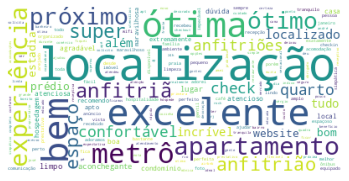

In [37]:
wordcloud = WordCloud(collocations=False, background_color='white').generate(all_keywords)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Nesta nuvem de palavras podemos observar os principais pontos levados em consideração nas avaliações em língua portuguesa, como localização, proximidade do metrô, conforto e anfitrião.

### Análise das Keywords em inglês

In [38]:
# Remoção das stop words

sw = set(stopwords.words('english'))

In [39]:
df_reviews_en = df_keywords[df_keywords.language == 'en']
df_reviews_en.head()

,listing_id,reviews,language
0,17878,"this apartment is in a perfect location -- two blocks from the beach and two blocks from the copacabana palace (where anyone famous stays when they are in rio), which means it´s a very safe neighborhood. the pictures very accurately depict what the apartment is like, so you´ll have no surprises. max is very communicative and helpful. the four of us that stayed here would highly recommend it.",en
1,17878,we had a really great experience staying in max's apartment. it was one block from copacabana beach with easy access to the local markets/shops. max was very helpful and went out of his way to send a list of suggestions on things to do. i will refer friends to max in the future if visiting rio. \r\n\r\nthanks for everything max!,en
2,17878,"staying in max appartment is like living in a cosy little french village and enyoing at te same time round the corner all the facilities that rio has to offer (metro, bus, shops, restaurants, supermarkets, and of course copa cabana beach). fantastic terrace, nicely decorated rooms, two spacious bedrooms, attentive doormen, and a host who really cares for his guests. \r\n\r\njan & iet",en
3,17878,"in general very good and reasonable price.\r\n\r\nit is really great having local calls for free.it give an extra service to the apartment and tourists in rio.\r\n\r\nthings that can be better:\r\n- towells in different colours, for differ the towels of each person (it is a bit silly...)\r\n- air conditioning in the rooms\r\n- dvd device included to the tv\r\n- some more kitchen things and better heating kitchen system (os fogos da cozinha electricos sao um poco lentos para cozinhar)\r\n\r\n...",en
4,17878,the apt was nice and in a great location only a couple of blocks from the beach and shopping. thanks for everything max!,en


In [40]:
df_reviews_en['reviews_wo_stopwords'] = df_reviews_en['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))
df_reviews_en['reviews_wo_stopwords'] = df_reviews_en['reviews_wo_stopwords'].str.replace(r'[^\w\s]+', '')

In [41]:
df_reviews_en['reviews_wo_stopwords'] = (df_reviews_en['reviews_wo_stopwords'] + '. ')

In [42]:
df_reviews_en.head()

,listing_id,reviews,language,reviews_wo_stopwords
0,17878,"this apartment is in a perfect location -- two blocks from the beach and two blocks from the copacabana palace (where anyone famous stays when they are in rio), which means it´s a very safe neighborhood. the pictures very accurately depict what the apartment is like, so you´ll have no surprises. max is very communicative and helpful. the four of us that stayed here would highly recommend it.",en,apartment perfect location two blocks beach two blocks copacabana palace where anyone famous stays rio means its safe neighborhood pictures accurately depict apartment like youll surprises max communicative helpful four us stayed would highly recommend it.
1,17878,we had a really great experience staying in max's apartment. it was one block from copacabana beach with easy access to the local markets/shops. max was very helpful and went out of his way to send a list of suggestions on things to do. i will refer friends to max in the future if visiting rio. \r\n\r\nthanks for everything max!,en,really great experience staying maxs apartment one block copacabana beach easy access local marketsshops max helpful went way send list suggestions things do refer friends max future visiting rio thanks everything max.
2,17878,"staying in max appartment is like living in a cosy little french village and enyoing at te same time round the corner all the facilities that rio has to offer (metro, bus, shops, restaurants, supermarkets, and of course copa cabana beach). fantastic terrace, nicely decorated rooms, two spacious bedrooms, attentive doormen, and a host who really cares for his guests. \r\n\r\njan & iet",en,staying max appartment like living cosy little french village enyoing te time round corner facilities rio offer metro bus shops restaurants supermarkets course copa cabana beach fantastic terrace nicely decorated rooms two spacious bedrooms attentive doormen host really cares guests jan iet.
3,17878,"in general very good and reasonable price.\r\n\r\nit is really great having local calls for free.it give an extra service to the apartment and tourists in rio.\r\n\r\nthings that can be better:\r\n- towells in different colours, for differ the towels of each person (it is a bit silly...)\r\n- air conditioning in the rooms\r\n- dvd device included to the tv\r\n- some more kitchen things and better heating kitchen system (os fogos da cozinha electricos sao um poco lentos para cozinhar)\r\n\r\n...",en,general good reasonable price really great local calls freeit give extra service apartment tourists rio things better towells different colours differ towels person it bit silly air conditioning rooms dvd device included tv kitchen things better heating kitchen system os fogos da cozinha electricos sao um poco lentos para cozinhar rest correct recommend apart people.
4,17878,the apt was nice and in a great location only a couple of blocks from the beach and shopping. thanks for everything max!,en,apt nice great location couple blocks beach shopping thanks everything max.


In [43]:
df_reviews_en = df_reviews_en[['listing_id', "language", 'reviews_wo_stopwords']]

In [44]:
df_reviews_en = df_reviews_en.groupby('listing_id')['reviews_wo_stopwords'].apply(''.join).reset_index()
df_reviews_en.shape

(10520, 2)

In [45]:
df_reviews_en.head()

,listing_id,reviews_wo_stopwords
0,17878,apartment perfect location two blocks beach two blocks copacabana palace where anyone famous stays rio means its safe neighborhood pictures accurately depict apartment like youll surprises max communicative helpful four us stayed would highly recommend it. really great experience staying maxs apartment one block copacabana beach easy access local marketsshops max helpful went way send list suggestions things do refer friends max future visiting rio thanks everything max. staying max appartm...
1,24480,host canceled reservation 158 days arrival. top marks apartment owner helpful modern elegant design neighborhood full cafes clubs boutiques near beach. loacation couldnt get better unless placed right beach 20 meter main street ipanema shopping dining etc 100 meters great ipanema beach see picture get nicely modern decorated apartment perfect two people couple everything clean small kitchenette tv loads channels nice bath nice wide bed linnen towels also provided aircon fan also worked with...
2,25026,girlfriend spent 8 days rio loved apartment clean great location nicelly decorated everything smooth viviane went way spent time us let us know best spots city able give lots insight spots known turist thank viviane eduardo. great apartment great location wondeful host anything need viviane there rio ten times enjoyable help. heard airbnb bloomberg article website hidden airbnb skeptical first made many inquiries hosts viviane host contacted me responded every inquiry quickly needed know use...
3,35636,flat good location get touristic places buses straight sugarloaf cristo rei easily walk cooacabana ipanema leblon also one safest places stay rio tidy cosy flat find everything need stay short longer periods personally stayed 4 days issue internet connection rest assured patricia everything power sort find support anything happens highly recommend stay patricias flat would stay return rio. stayed apartment two nights hardly call apartment real artwork spacious rooms i stayed alone brilli...
4,35764,nice stay rio apartment excellent located facilities needed patricia excellent host thanks lot hope back soon. wife great stay patricias apartment advertized clean convenient comfortable patricia husband generous helpful provided information local sites always available even helped us cell phone would hesitate moment stay highly recommend apartment. patricia wonderful host really helpful everything apartment great really close everything nice copacabana im sorry go back home. trip rio de jen...


In [46]:
keywords(df_reviews_en, 5)

In [47]:
df_reviews_en.head()

,listing_id,reviews_wo_stopwords,keywords_list
0,17878,apartment perfect location two blocks beach two blocks copacabana palace where anyone famous stays rio means its safe neighborhood pictures accurately depict apartment like youll surprises max communicative helpful four us stayed would highly recommend it. really great experience staying maxs apartment one block copacabana beach easy access local marketsshops max helpful went way send list suggestions things do refer friends max future visiting rio thanks everything max. staying max appartm...,"max, amazing, enjoyed, 2, 5"
1,24480,host canceled reservation 158 days arrival. top marks apartment owner helpful modern elegant design neighborhood full cafes clubs boutiques near beach. loacation couldnt get better unless placed right beach 20 meter main street ipanema shopping dining etc 100 meters great ipanema beach see picture get nicely modern decorated apartment perfect two people couple everything clean small kitchenette tv loads channels nice bath nice wide bed linnen towels also provided aircon fan also worked with...,"2, 3, 5, size, enjoyed"
2,25026,girlfriend spent 8 days rio loved apartment clean great location nicelly decorated everything smooth viviane went way spent time us let us know best spots city able give lots insight spots known turist thank viviane eduardo. great apartment great location wondeful host anything need viviane there rio ten times enjoyable help. heard airbnb bloomberg article website hidden airbnb skeptical first made many inquiries hosts viviane host contacted me responded every inquiry quickly needed know use...,"2, 5, amazing, enjoyed, 15"
3,35636,flat good location get touristic places buses straight sugarloaf cristo rei easily walk cooacabana ipanema leblon also one safest places stay rio tidy cosy flat find everything need stay short longer periods personally stayed 4 days issue internet connection rest assured patricia everything power sort find support anything happens highly recommend stay patricias flat would stay return rio. stayed apartment two nights hardly call apartment real artwork spacious rooms i stayed alone brilli...,"5, enjoyed, quick, quiet, apartment"
4,35764,nice stay rio apartment excellent located facilities needed patricia excellent host thanks lot hope back soon. wife great stay patricias apartment advertized clean convenient comfortable patricia husband generous helpful provided information local sites always available even helped us cell phone would hesitate moment stay highly recommend apartment. patricia wonderful host really helpful everything apartment great really close everything nice copacabana im sorry go back home. trip rio de jen...,"2, amazing, 10, questions, 24"


In [48]:
all_keywords_en = " ".join(review for review in df_reviews_en.keywords_list)

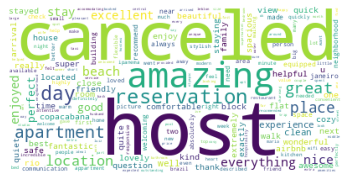

In [49]:
wordcloud_en = WordCloud(collocations=False, background_color='white').generate(all_keywords_en)
plt.imshow(wordcloud_en)
plt.axis("off")
plt.show()

Nesta nuvem de palavras podemos notar que as palavras 'canceled', 'host' e 'reservation' são predominantes, mostrando uma preocupação com o cancelamento de reservas e uma importância do anfitrião. Palavras presentes na nuvem em português, parecem ter menor importância nesta nuvem.